# Ejemplo de pronósticos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
def best_arima(data, p_range, d_range, q_range):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = sm.tsa.ARIMA(data, order=(p, d, q)).fit()
                    if model.aic < best_aic:
                        best_aic = model.aic
                        best_order = (p, d, q)
                        best_model = model
                except:
                    continue
    return best_order, best_model

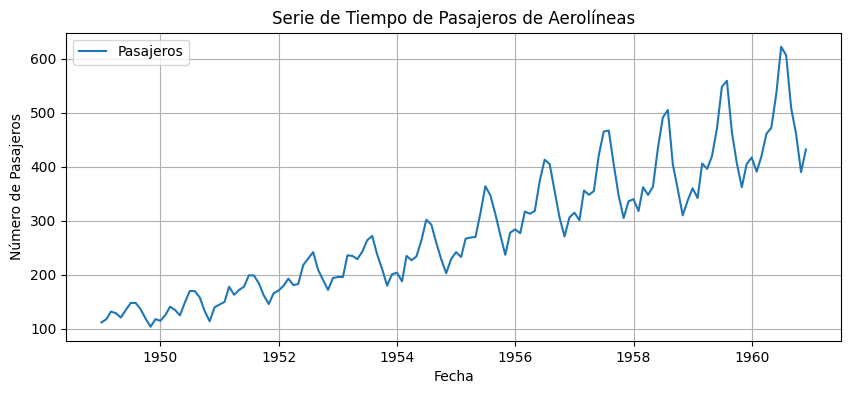

In [4]:

# Cargar datos de tiempo desde un URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Renombramos la columna y convertimos la columna de fecha
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(10, 4))
plt.plot(data['Passengers'], label='Pasajeros')
plt.title('Serie de Tiempo de Pasajeros de Aerolíneas')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid()
plt.show()


In [5]:
# Encontrar los mejores parámetros ARIMA
p = range(0, 3)  # Orden AR
d = range(0, 2)  # Diferenciaciones
q = range(0, 3)  # Orden MA

best_order_arima, best_model_arima = best_arima(data['Passengers'], p, d, q)
print("Mejores parámetros ARIMA:", best_order_arima)

c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData

Mejores parámetros ARIMA: (2, 1, 2)


C:\Users\alonso.sandoval\AppData\Local\Temp\ipykernel_4296\2029441613.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=30), periods=n_periods, freq='M')


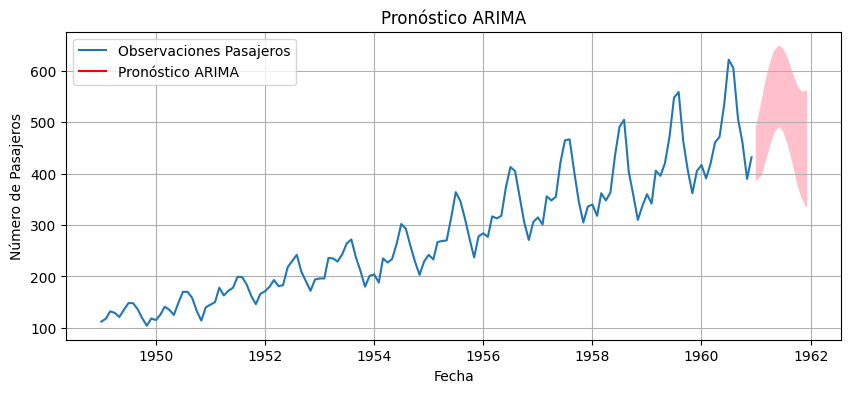

In [6]:
# Pronóstico ARIMA
n_periods = 12
forecast_arima = best_model_arima.get_forecast(steps=n_periods)
forecast_series_arima = forecast_arima.predicted_mean
conf_int_arima = forecast_arima.conf_int()

# Graficar pronóstico ARIMA
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=30), periods=n_periods, freq='M')
forecast_series_arima = pd.Series(forecast_series_arima, index=forecast_index)

plt.figure(figsize=(10, 4))
plt.plot(data['Passengers'], label='Observaciones Pasajeros')
plt.plot(forecast_series_arima, label='Pronóstico ARIMA', color='red')
plt.fill_between(forecast_index, conf_int_arima.iloc[:, 0], conf_int_arima.iloc[:, 1], color='pink')
plt.title('Pronóstico ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid()
plt.show()